In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
%matplotlib inline

D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [34]:
df=pd.read_csv("Train_UWu5bXk.csv")
test=pd.read_csv("Test_u94Q5KV.csv")
train=df

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
idsUnique=len(set(df.Item_Identifier))
idsTotal=len(df)
print("duplicate ids "+str(idsTotal-idsUnique))

duplicate ids 6964


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

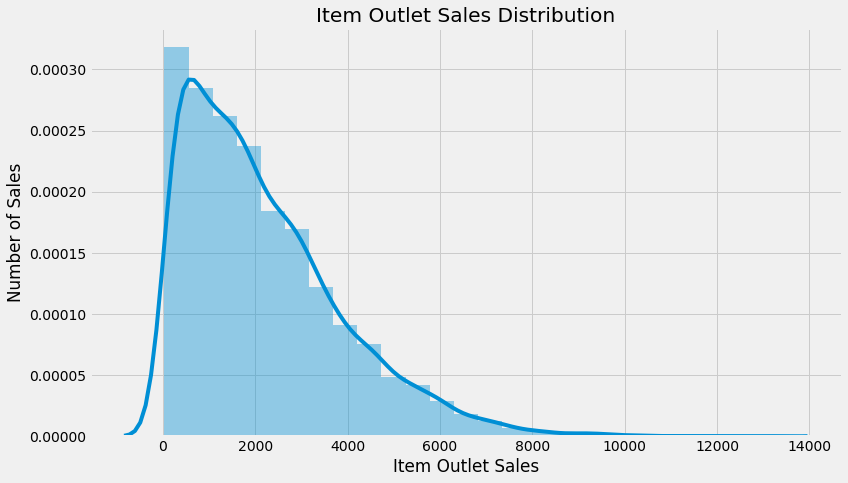

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Outlet_Sales,bins=25)
plt.ticklabel_format(style='plain',axis='x',scilimits=(0,1))
plt.xlabel("Item Outlet Sales")
plt.ylabel("Number of Sales")
plt.title("Item Outlet Sales Distribution")

In [8]:
print("Skew is:"+str(df.Item_Outlet_Sales.skew()))
print("Kurtosis is:"+str(df.Item_Outlet_Sales.kurt()))

Skew is:1.1775306028542798
Kurtosis is:1.6158766814287264


In [9]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [10]:
corr=numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [11]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


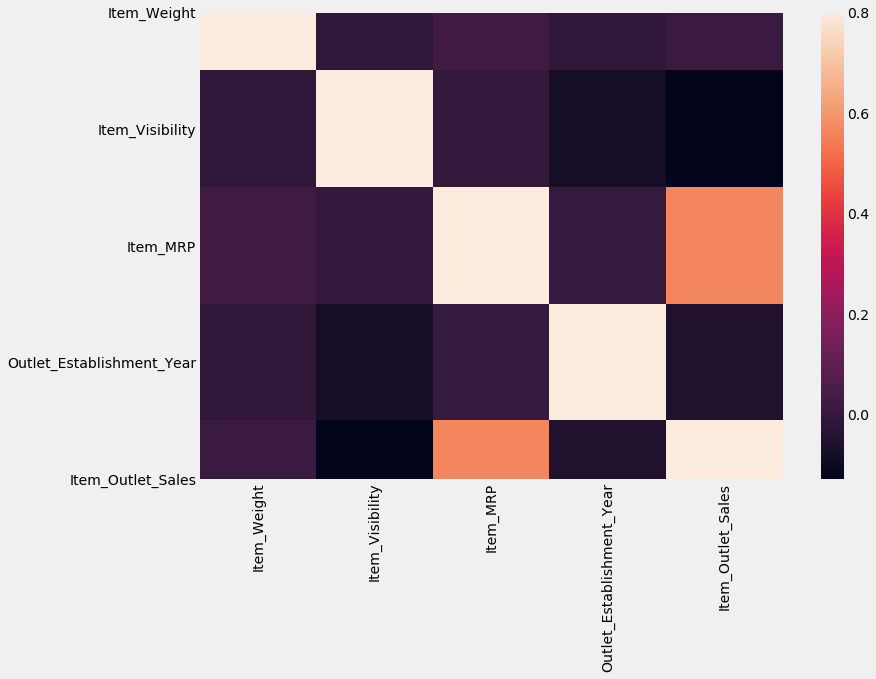

In [31]:
#correlation matrix
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr,vmax=0.8,square=True)

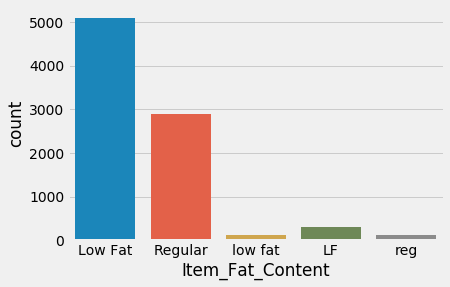

In [13]:
sns.countplot(df.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

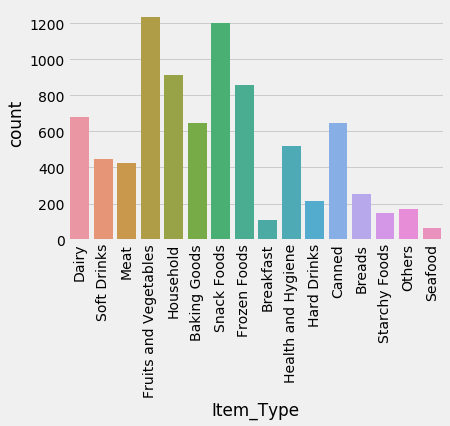

In [14]:
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)

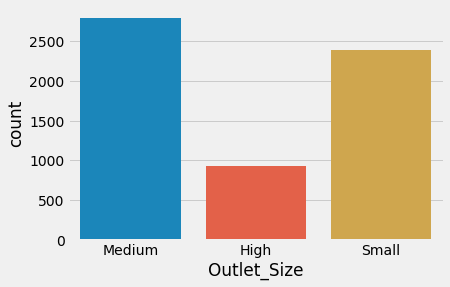

In [15]:
sns.countplot(df.Outlet_Size)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

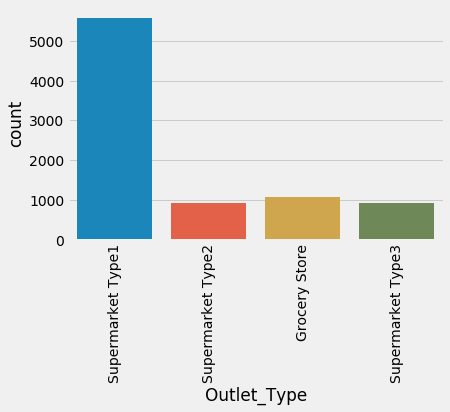

In [16]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

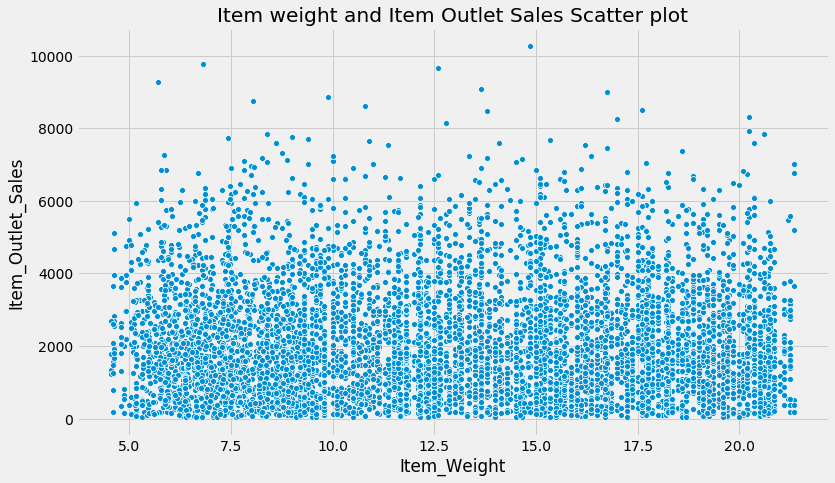

In [17]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Weight")
plt.ylabel("Item Output Sales")
plt.title("Item weight and Item Outlet Sales Scatter plot")
sns.scatterplot(df.Item_Weight,df.Item_Outlet_Sales)

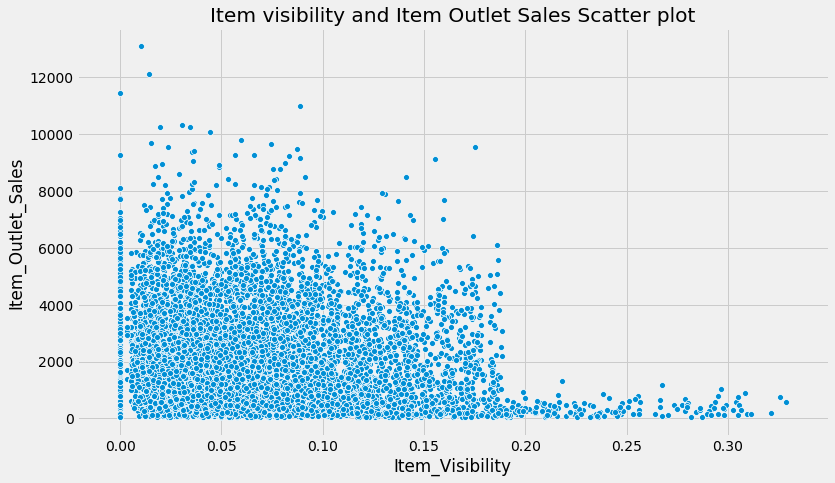

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Item visibility")
plt.ylabel("Item Output Sales")
plt.title("Item visibility and Item Outlet Sales Scatter plot")
sns.scatterplot(df.Item_Visibility,df.Item_Outlet_Sales)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

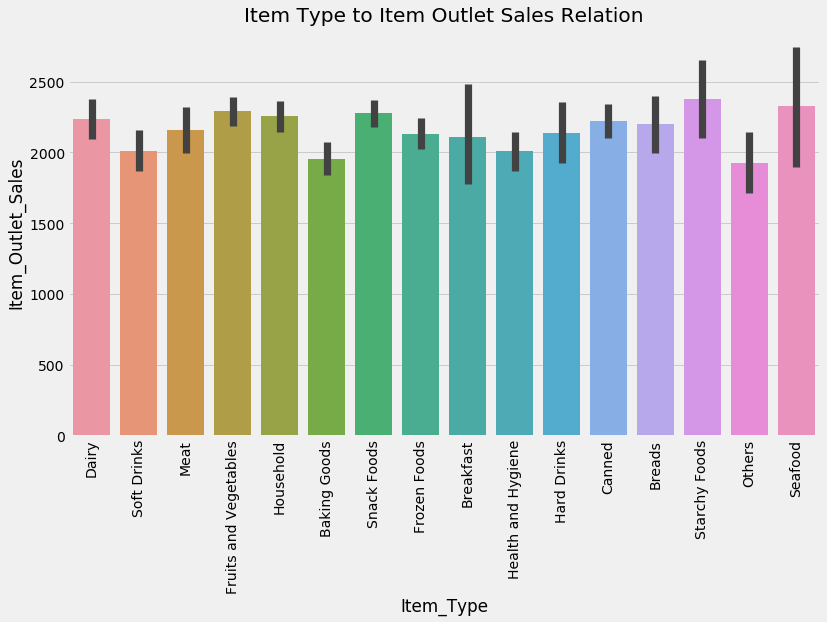

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.title("Item Type to Item Outlet Sales Relation")
sns.barplot(df.Item_Type,df.Item_Outlet_Sales)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

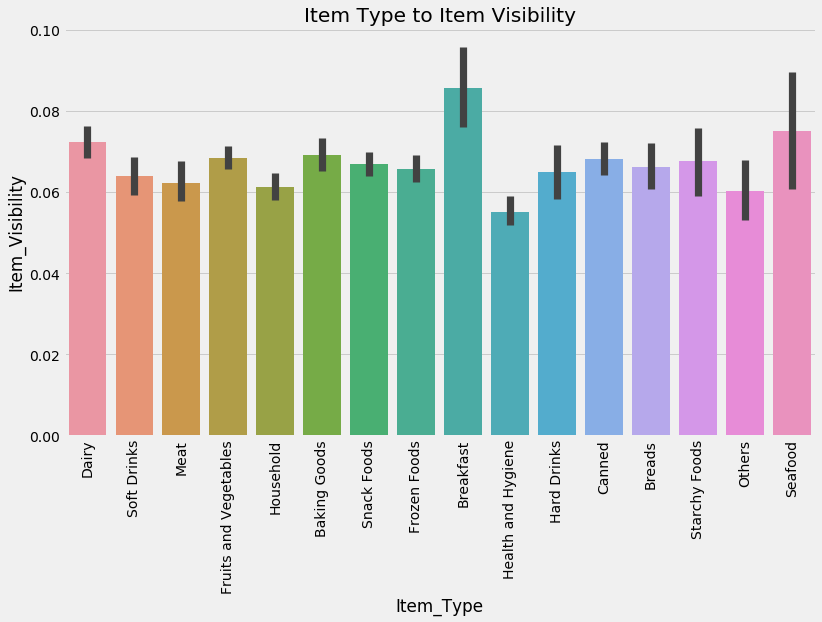

In [20]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Type")
plt.ylabel("Item Visibility")
plt.title("Item Type to Item Visibility")
sns.barplot(df.Item_Type,df.Item_Visibility)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

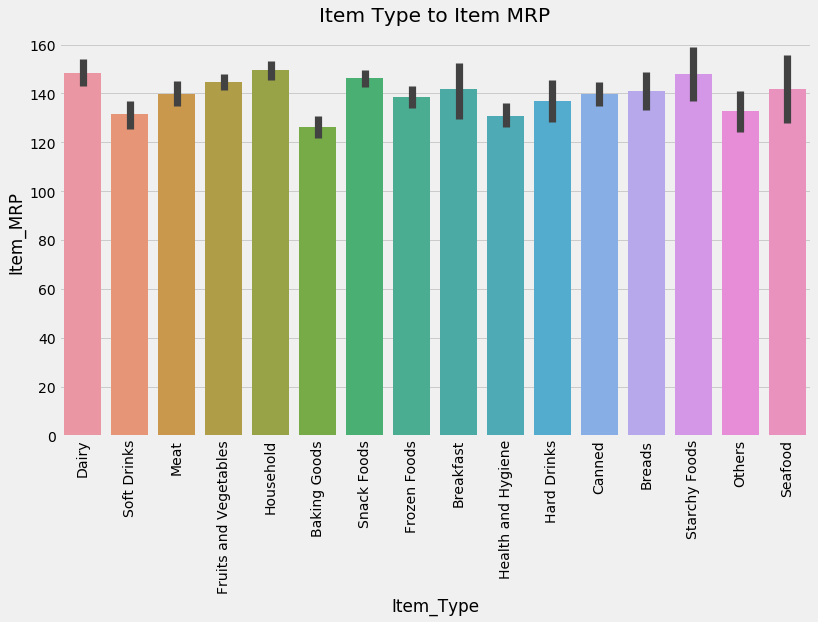

In [21]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Type")
plt.ylabel("Item MRP")
plt.title("Item Type to Item MRP")
sns.barplot(df.Item_Type,df.Item_MRP)
plt.xticks(rotation=90)

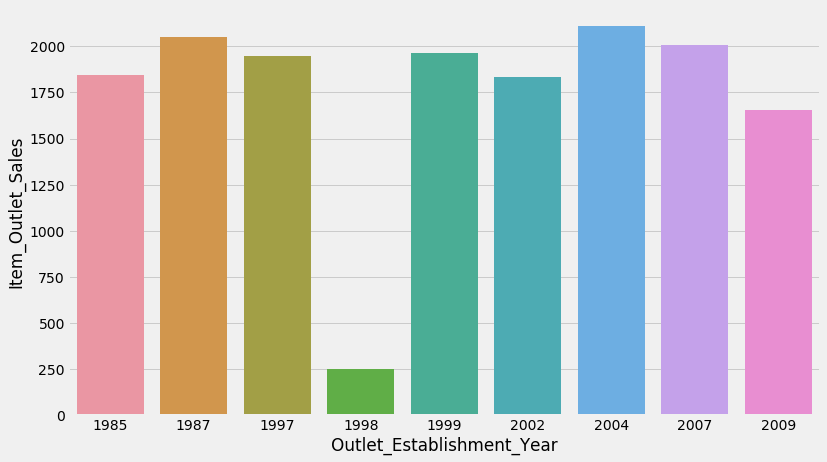

In [22]:
plt.figure(figsize=(12,7))
Outlet_Establishment_Year_pivot = \
op=df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
sns.barplot(op.index,op.Item_Outlet_Sales)

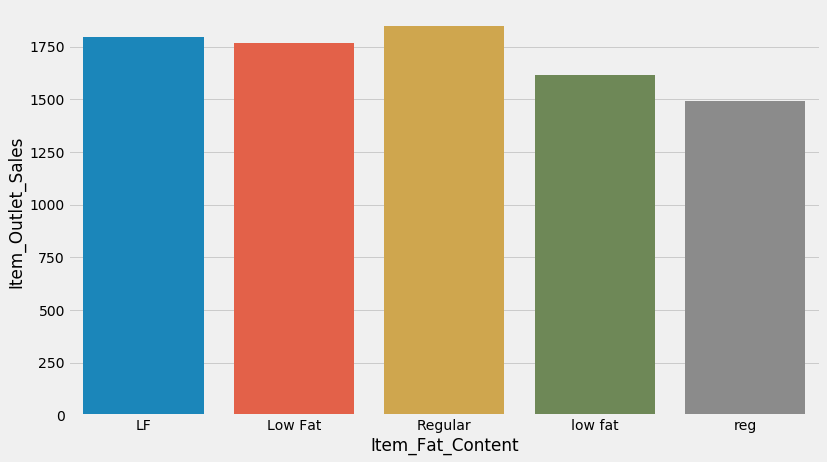

In [23]:
plt.figure(figsize=(12,7))
Item_Fat_Content_pivot = \
a=df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
sns.barplot(a.index,a.Item_Outlet_Sales)

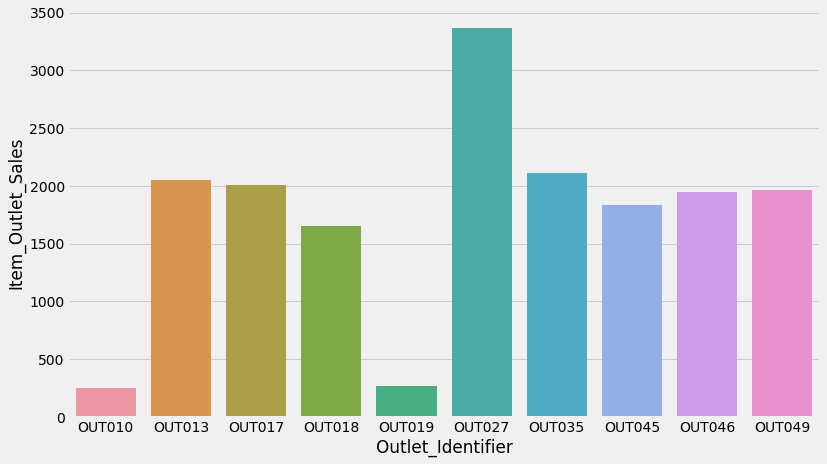

In [24]:
plt.figure(figsize=(12,7))
Outlet_Identifier_Pivot=\
op=df.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
sns.barplot(op.index,op.Item_Outlet_Sales)

In [25]:
df.pivot_table(values='Outlet_Type',columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [26]:
df.pivot_table(values='Outlet_Type',columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


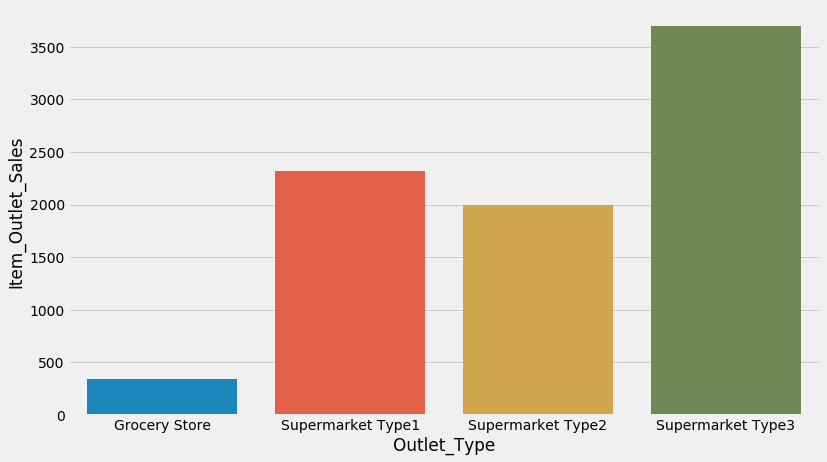

In [27]:
plt.figure(figsize=(12,7))
Outlet_Type_Pivot=\
op=df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')
sns.barplot(op.index,op.Item_Outlet_Sales)

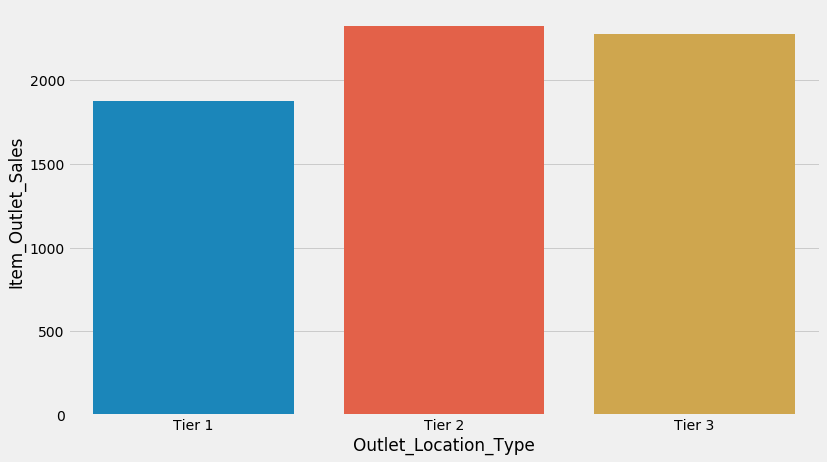

In [28]:
plt.figure(figsize=(12,7))
Outlet_LOcation_Type_Pivot=\
op=df.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales')
sns.barplot(op.index,op.Item_Outlet_Sales)

In [29]:
df.pivot_table(values='Outlet_Location_Type',columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


# Pre-Processing

In [36]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [40]:
data.sample(7)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
5278,Low Fat,FDC58,42.5428,878.8560,Snack Foods,0.042113,10.195,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
10940,Regular,FDG21,149.9050,NaN,Seafood,0.146178,17.350,1987,OUT013,Tier 3,High,Supermarket Type1,test
651,Low Fat,FDY07,46.5402,229.7010,Fruits and Vegetables,0.000000,11.800,1998,OUT010,Tier 3,NaN,Grocery Store,train
6042,Regular,FDP49,55.0614,442.0912,Breakfast,0.069031,9.000,1987,OUT013,Tier 3,High,Supermarket Type1,train
10532,Low Fat,FDC45,170.8106,NaN,Fruits and Vegetables,0.135620,17.000,1987,OUT013,Tier 3,High,Supermarket Type1,test
7725,Low Fat,DRL49,143.4812,854.8872,Soft Drinks,0.056517,13.150,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1990,Low Fat,FDE53,107.2280,426.1120,Frozen Foods,0.044992,10.895,1998,OUT010,Tier 3,NaN,Grocery Store,train


In [43]:
data.isnull().sum()/len(data)*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64